# QuickGuide for Text analysis
[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting

In [2]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 
!pip install -U wordcloud nltk 
!pip install -U PyMuPDF pytube
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn
!pip install -U mkt-retv

## Package Import 

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pathlib import Path
import pandas as pd
from market_research.analysis import TextAnalysis
# from market_research.analysis import SentiGPT

## 준비

### 분석 폴더
- `input`에 파일을 넣어주세요.

In [4]:
tas = TextAnalysis()

## Text 분석

### SONY group Q&A Summary (Earnings Releases) 2019~2023
https://www.sony.com/en/SonyInfo/IR/library/presen/er/archive.html

In [5]:
files_path = tas.read_files_from_inputpath(docs_type="pdf")
files_path # SONY group earing call QnA 2019~2023

[WindowsPath('input/19q1_qa.pdf'),
 WindowsPath('input/19q2_qa.pdf'),
 WindowsPath('input/19q3_qa.pdf'),
 WindowsPath('input/19q4_qa.pdf'),
 WindowsPath('input/20q1_qa.pdf'),
 WindowsPath('input/20q2_qa.pdf'),
 WindowsPath('input/20q3_qa.pdf'),
 WindowsPath('input/20q4_qa.pdf'),
 WindowsPath('input/21q1_qa.pdf'),
 WindowsPath('input/21q2_qa.pdf'),
 WindowsPath('input/21q3_qa.pdf'),
 WindowsPath('input/21q4_qa.pdf'),
 WindowsPath('input/22q1_qa.pdf'),
 WindowsPath('input/22q2_qa.pdf'),
 WindowsPath('input/22q3_qa.pdf'),
 WindowsPath('input/22q4_qa.pdf')]

In [7]:
comments_dict = {file_path.name.replace(".pdf",""):tas.pdf_to_text(file_path) for file_path in files_path}

#### 필터링 단어 설정

In [4]:
cleaning_words = [  #사전 필터링하는 단어
    "half","fy2021","fy2020", "month","way", "input","earnings",
    "forecast","please","terms","market","g","ns", "unit","assets",
    "fy2022","levels","q","fy2023","numbers","result","units",
    "factors","costs","ss","q1","part",'segment', 'quarter', 
    'statements', 'business', 'question', 'yen', 'year', 'sony', 'results',
    "end","q2","questioner",
    "session","fy2024",
    # "sale","plan","capacity","growth","demand",
    "outlook","increase","investment",
    "example","rate","flow","time","a2","a1","sfh","r","dtc", "statement",
    "plan", "tax", "value", "term","capital", "growth","company","group", "service"
]


#### 단어 교정

In [ ]:
replacement_mapping = {  #사전에 교체하는 단어
    "games": "game",
    "plans": "plan",
    "sensors": "sensor",
    "changes": "change",
    "risks": "risk",
    "services": "service",
    "margins": "margin",
    "profits": "profit",
    "wafers": "wafer",
    "sizes": "size",
    "customers": "customer",
    "applications": "application",
    "shortages": "shortage",
    "expenses": "expense",
    "sales":"sale",
    "titles":"title",
    "conditions":"condition",
    "prices":"price",
    "investments":"investment",
    "rates":"rate",
    "inventories":"inventory",
    "uncertainties":"uncertainty",
    "cameras":"camera",
    "opportunities":"opportunity",
    "volumes":"volume",
    "costs":"cost",
    "technologies":"technology",
    "employees":"employee",
    "companies":"company",
    "creators":"creator",
    "challenges":"challenge",
    "businesses":"business",
    "years":"year",
    "electronics":"electronic",
    "strategies":"strategy",
    "electronics":"electronic",
    "targets":"target",
    "statements":"statement"
}

#### visualization: wordcloud, freq


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
       Nouns  Frequency
31     sale         30
60   profit         16
64     cost         15
25       q1         15
27  segment         15


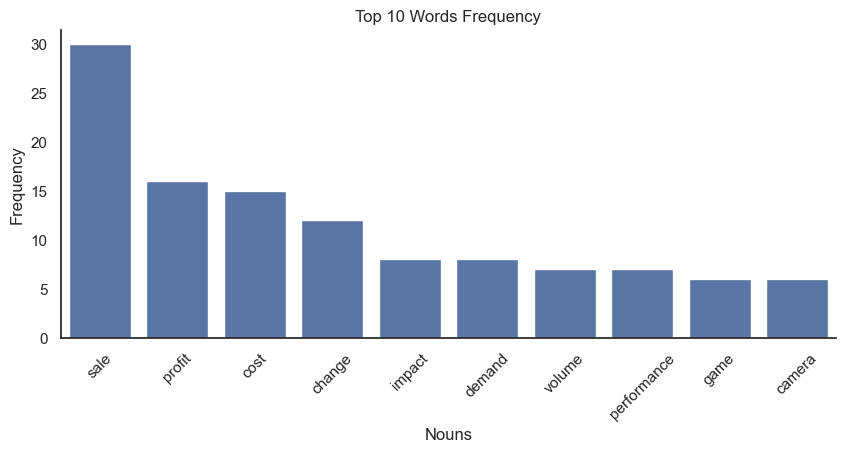

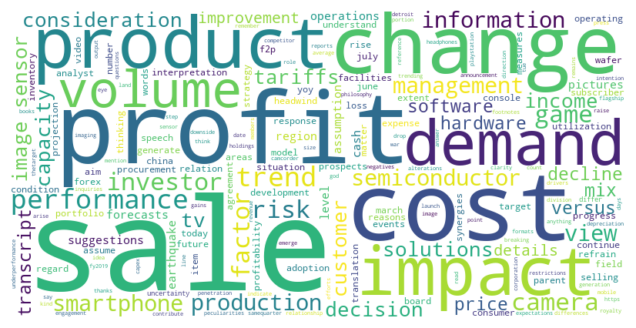


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
        Nouns  Frequency
9   question         23
25      sale         20
28    profit         19
48      year         18
76      game         15


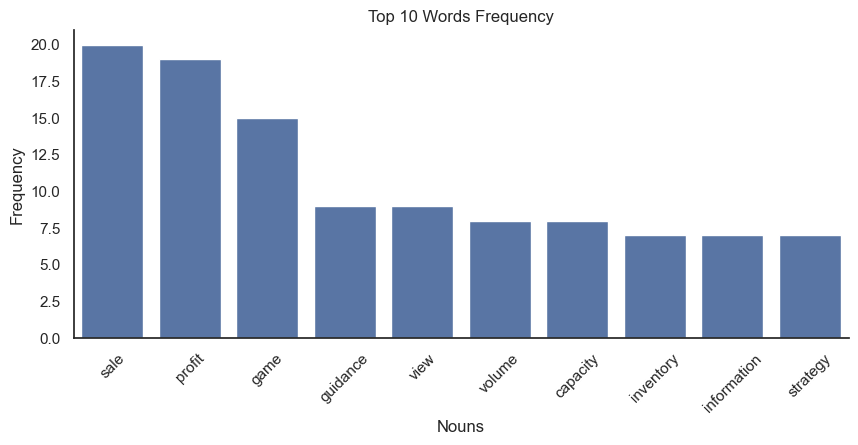

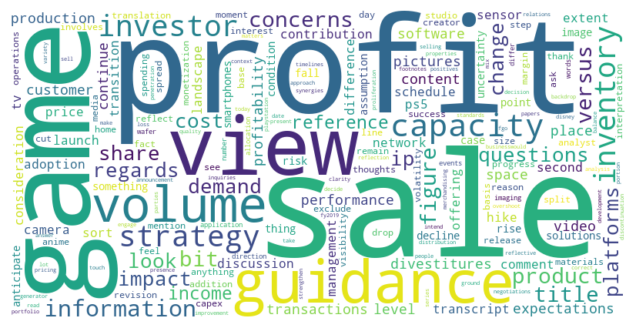


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
       Nouns  Frequency
13  quarter         29
23  segment         28
71     game         16
22       ss         13
50     plan         13


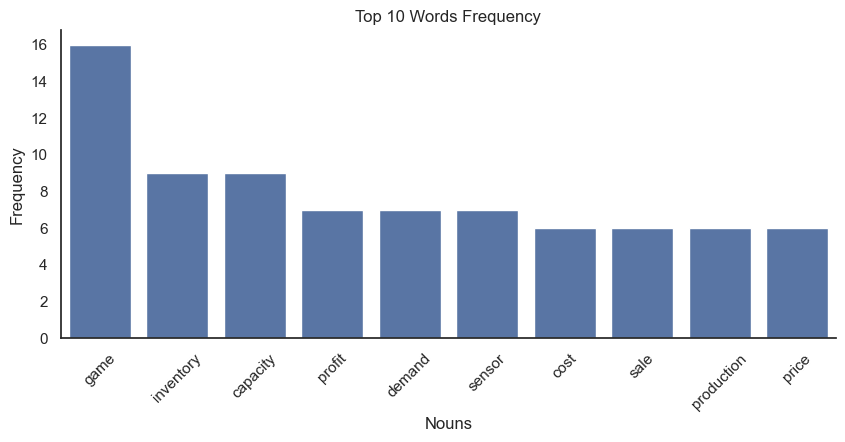

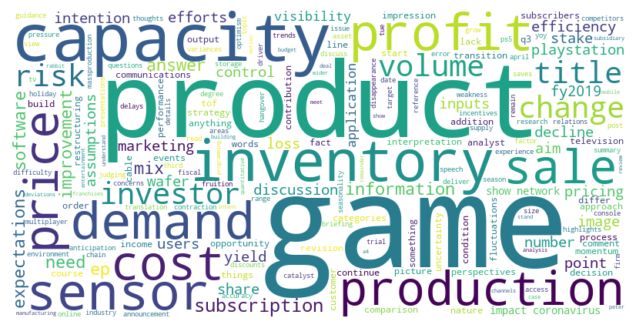


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
6    statement         11
18     segment         10
25      fy2020          9
63        plan          9
162   capacity          9


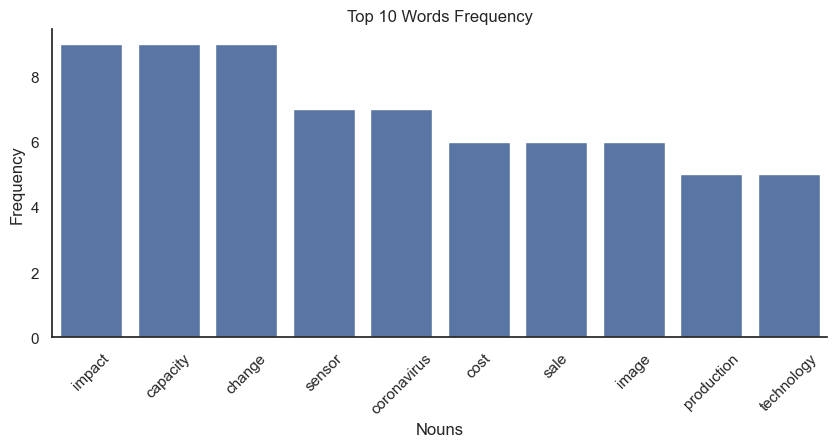

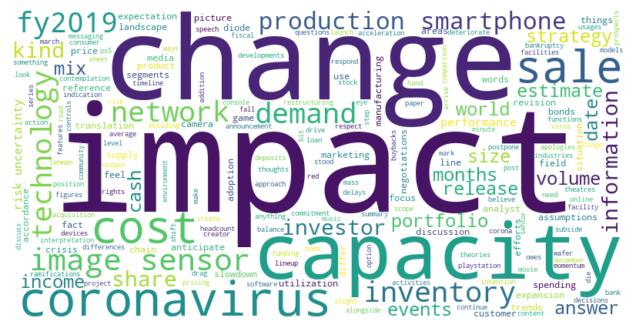


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
14    quarter         19
94        yen         17
21    segment         12
8   statement         10
26     demand          9


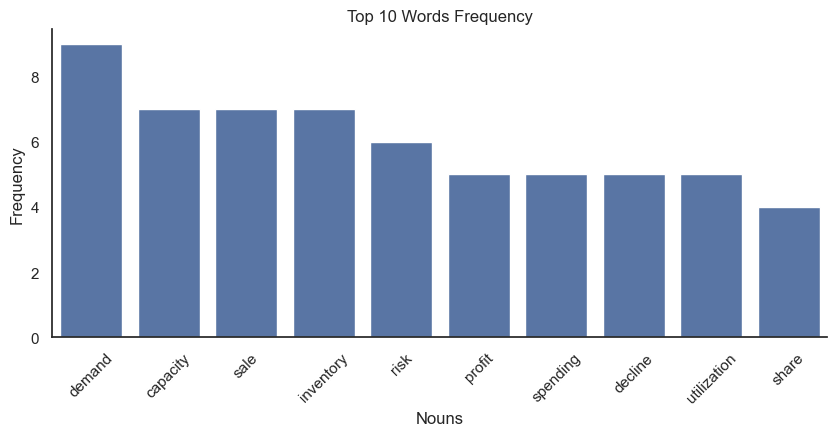

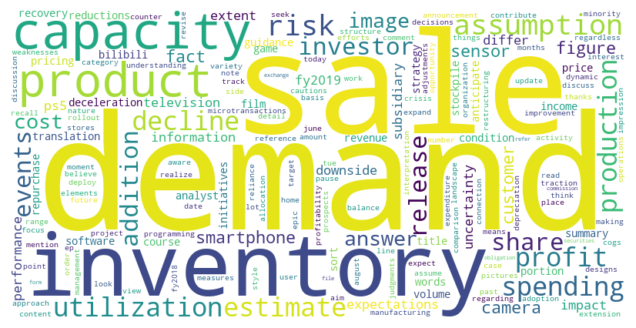


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
18    segment         22
12    quarter         12
6   statement         11
52   business         10
29   customer          9


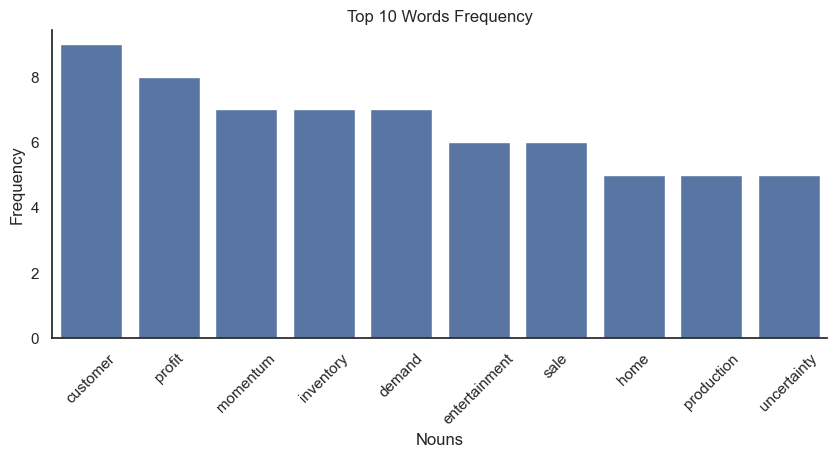

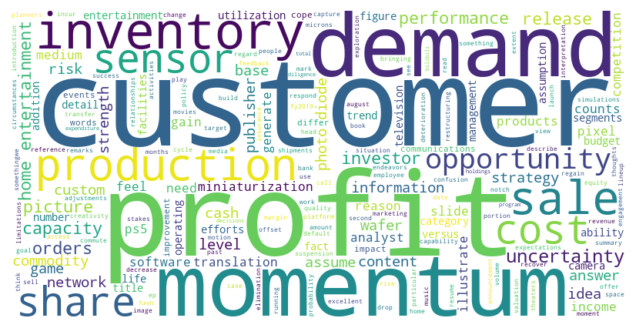


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
86    business         17
18     segment         14
6    statement         13
101     margin         10
75      profit          8


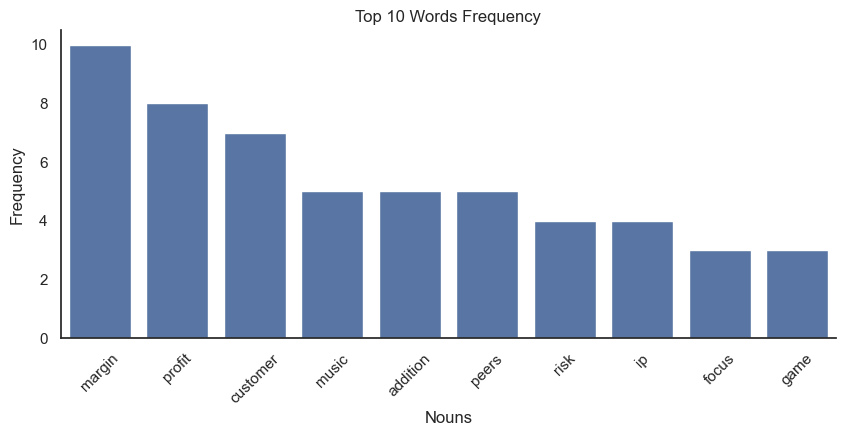

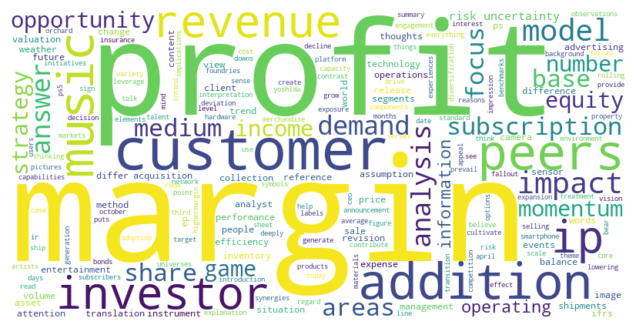


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 20q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
19     segment         14
27    capacity         13
7    statement         11
100     profit         10
66         yen         10


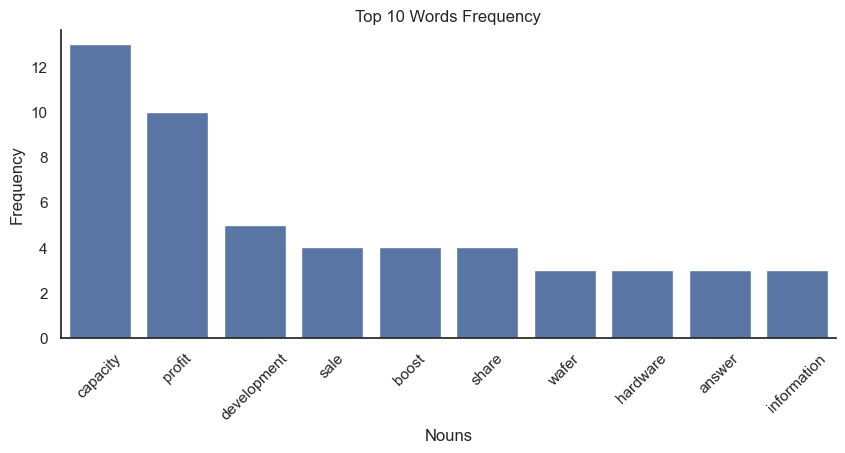

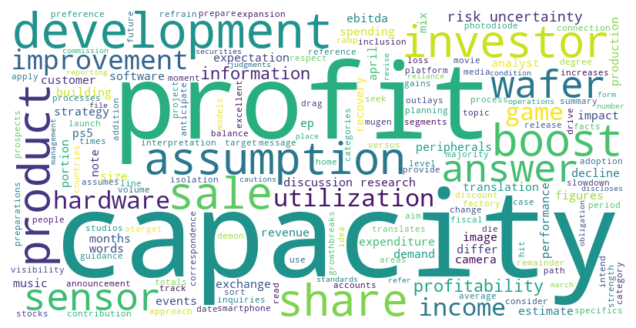


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
13    quarter         17
7   statement         11
20      price          9
28     market          8
18    segment          7


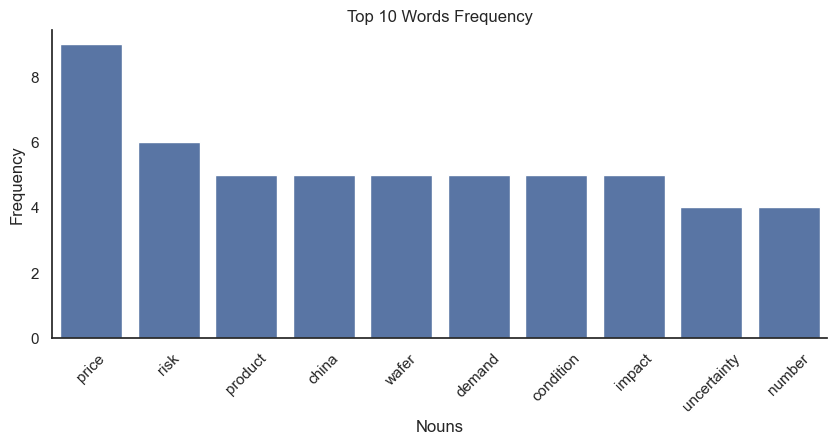

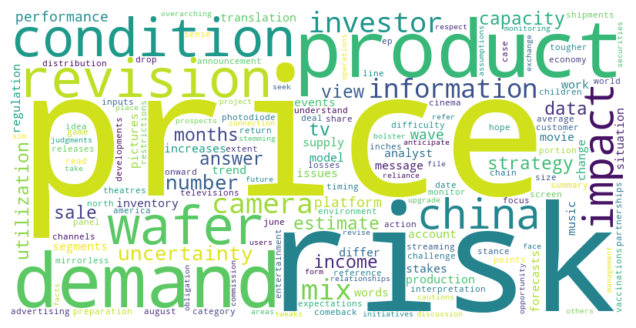


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
113  investment         12
13      quarter         12
7     statement         11
20      segment          8
171      market          7


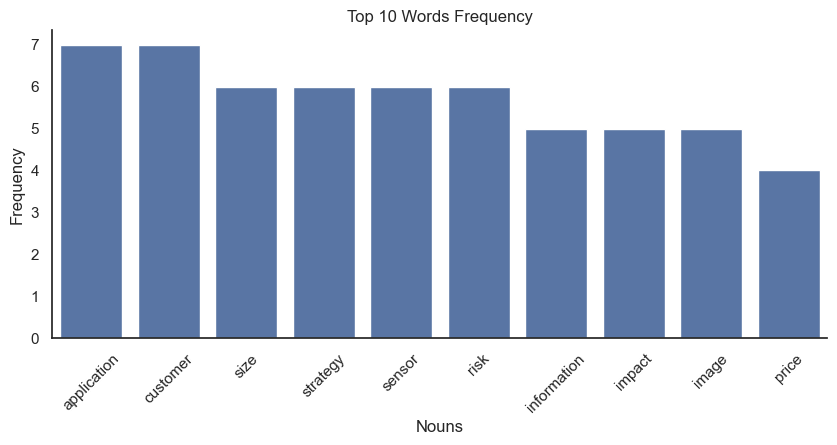

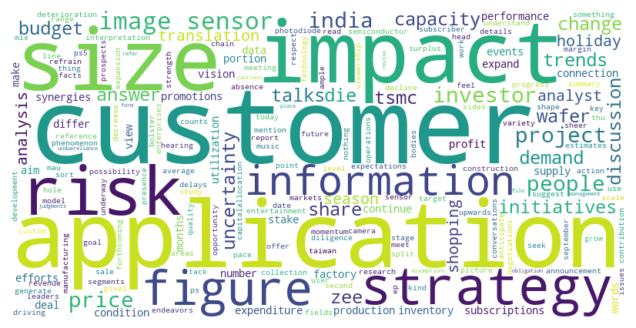


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
6     statement         11
105   inventory         11
80         sony          9
201      bungie          9
68   investment          8


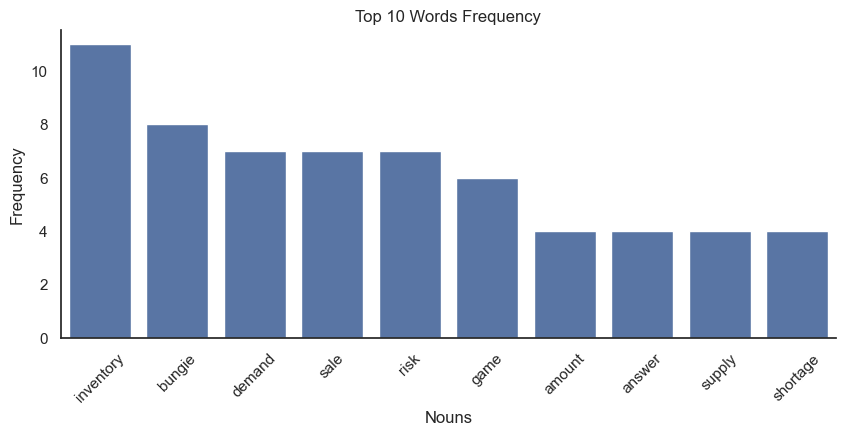

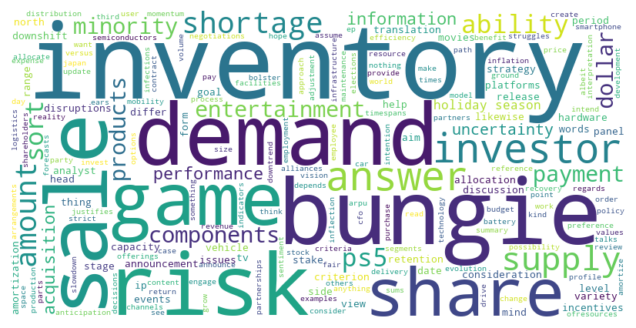


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 21q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
7   statement         11
20    segment         10
28     fy2022          9
55  inventory          8
56     levels          7


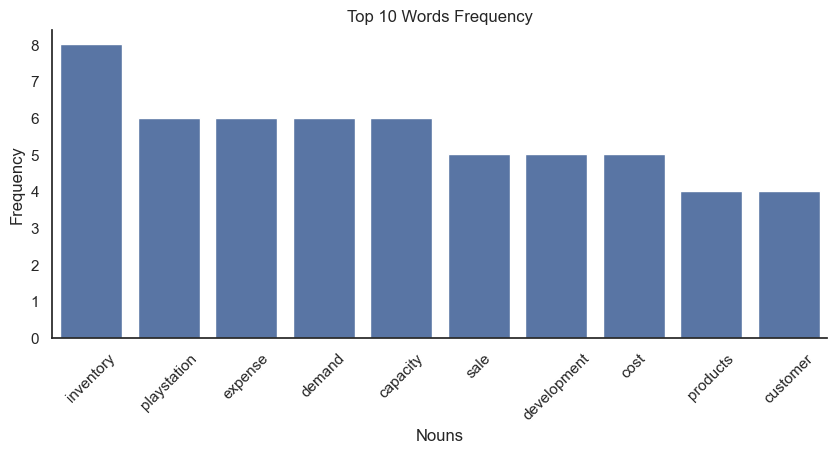

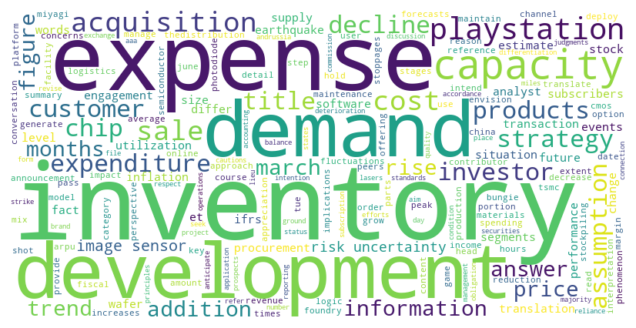


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
45  inventory         19
14    quarter         16
20    segment         13
24       sale         12
54   forecast         11


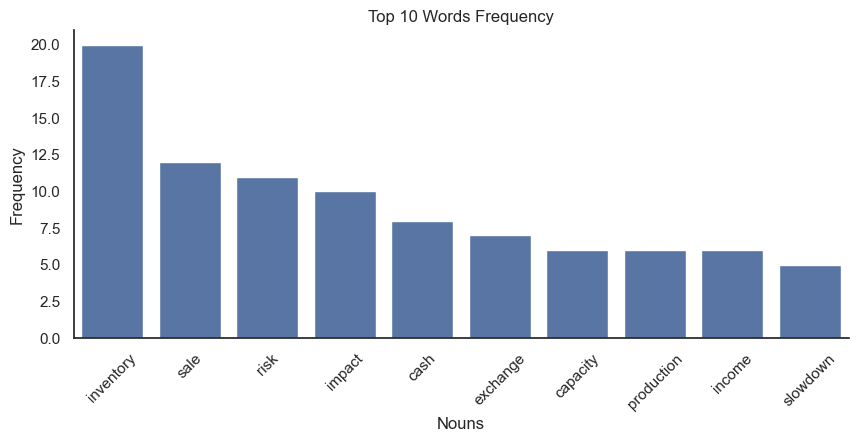

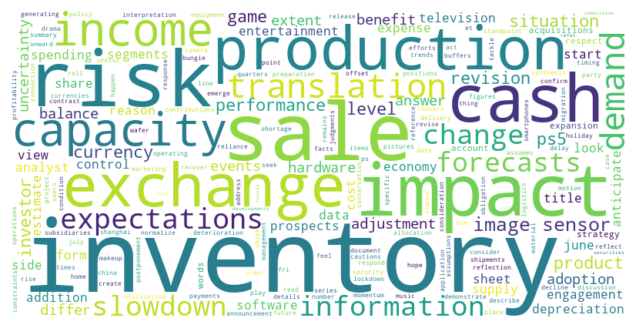


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q2_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
13    quarter         12
7   statement         11
18    segment          9
45       plan          7
67      title          7


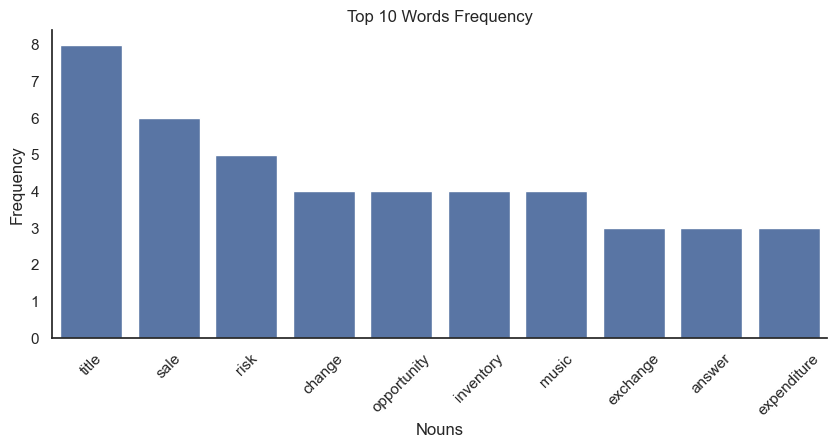

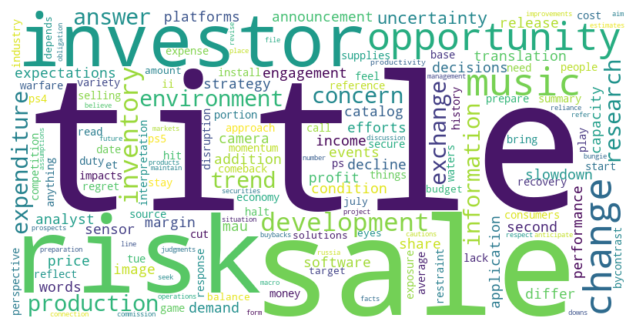


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q3_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
13    quarter         12
7   statement         11
12    results          6
20    segment          6
21      units          5


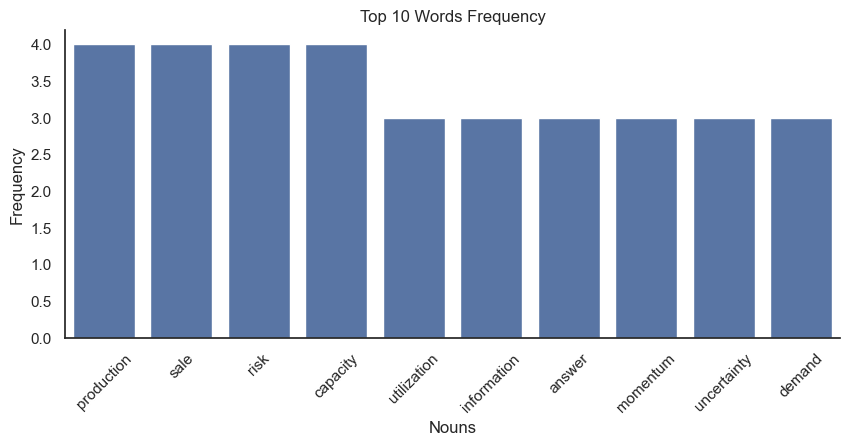

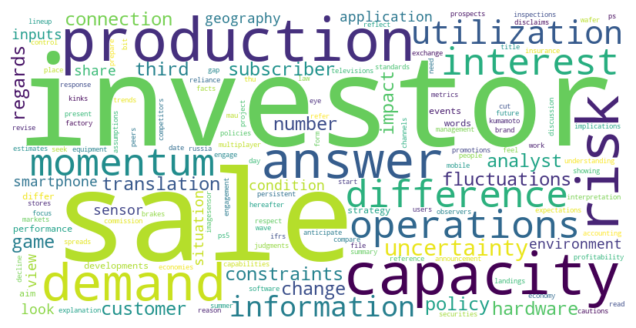


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 22q4_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
54       sale         14
87  inventory         13
45    expense         11
20    segment         11
8   statement         11


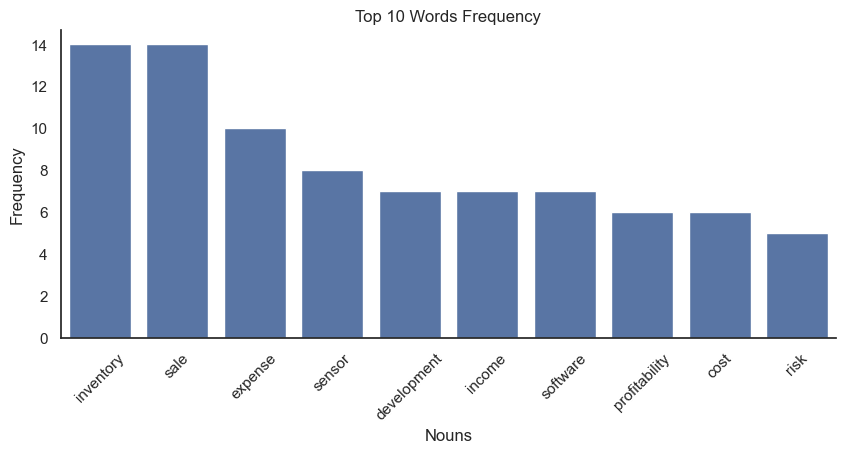

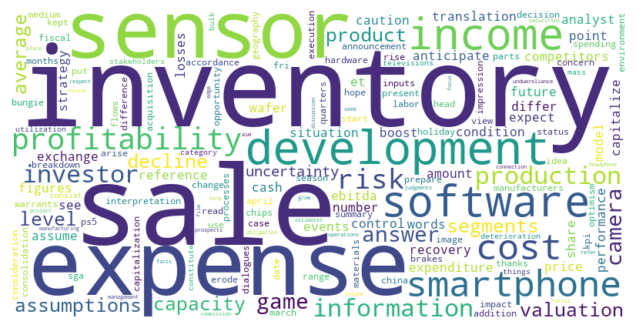

In [5]:
for filename, comment in comments_dict.items():
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ {filename} ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    for original, replacement in replacement_mapping.items():  #복수형 단수로 변경
        comment = comment.replace(original, replacement)
        
    tas.set_comments([comment], [])
    print(f"top 5 words before cleaning: \n {tas.df_word_freq.sort_values(by='Frequency', ascending=False).head(5)}")

    tas.set_comments([comment], cleaning_words)
    tas.plot_freq()
    tas.plot_wordcloud()

#### summarization

In [34]:
summary_dict = {}

for filename, comment in comments_dict.items():
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ {filename} ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    # summary = sentgpt.analyze_sentiment(assistant=assistant, sentence= comments_dict.get(filename))
    print(comment)
    # summary_dict[filename] = summary


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 19q1_qa ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

fy2019 q1 earnings announcement 
analyst and investor briefing q&a (summary) 
 
date: july 30, 2019 (tue) 
 
important: please read the following statement 
for your reference, below please find an english translation of the question and answer session at 
the analyst and investor briefing for the financial results for the first quarter ended june 30, 2019, 
which was conducted in japanese (except for questions asked in english).     
 
this transcript has been edited for the sake of clarity.  footnotes have been included to correct any 
inaccurate statements. 
 
as a result, there are some differences between the english translation of the transcript below and 
the simultaneous english interpretation provided at the actual question and answer session.  a 
recording of the simultaneous english interpretation can be found on the sony investor relation

### SONY group Q&A Summary (Corporate Strategy Meeting) 2021~2023
https://www.sony.com/en/SonyInfo/IR/library/presen/strategy/archive.html

In [9]:
files_path = tas.read_files_from_inputpath(docs_type="pdf")
files_path # SONY group earing call QnA 2019~2023

[WindowsPath('input/qa_E_2020_May_19.pdf'),
 WindowsPath('input/qa_E_2021_May_26.pdf'),
 WindowsPath('input/qa_E_2022_May_18.pdf'),
 WindowsPath('input/qa_E_2023_May_18.pdf')]

#### 필터링 단어 설정

In [27]:
cleaning_words = [  #사전 필터링하는 단
    "half","fy2021","fy2020", "month","way", "input","earnings",
    "forecast","please","terms","market","g","ns", "unit","assets",
    "fy2022","levels","q","fy2023","numbers","result","units",
    "factors","costs","ss","q1","part",'segment', 'quarter', 
    'statements', 'business', 'question', 'yen', 'year', 'sony', 'results',
    "end","q2","questioner",
    "session","fy2024",
    # "sale","plan","capacity","growth","demand",
    "outlook","increase","investment",
    "example","rate","flow","time","a2","a1","sfh","r","dtc", "statement",
    "plan", "tax", "value", "term","capital", "growth","company","group", "service",
    "risk","profit","minotrity"
]



#### 단어 교정

In [ ]:
replacement_mapping = {  #사전에 교체하는 단어
    "games": "game",
    "plans": "plan",
    "sensors": "sensor",
    "changes": "change",
    "risks": "risk",
    "services": "service",
    "margins": "margin",
    "profits": "profit",
    "wafers": "wafer",
    "sizes": "size",
    "customers": "customer",
    "applications": "application",
    "shortages": "shortage",
    "expenses": "expense",
    "sales":"sale",
    "titles":"title",
    "conditions":"condition",
    "prices":"price",
    "investments":"investment",
    "rates":"rate",
    "inventories":"inventory",
    "uncertainties":"uncertainty",
    "cameras":"camera",
    "opportunities":"opportunity",
    "volumes":"volume",
    "costs":"cost",
    "technologies":"technology",
    "employees":"employee",
    "companies":"company",
    "creators":"creator",
    "challenges":"challenge",
    "businesses":"business",
    "years":"year",
    "electronics":"electronic",
    "strategies":"strategy",
    "electronics":"electronic",
    "targets":"target",
    "statements":"statement"
}

#### visualization: wordcloud, freq


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2020_May_19 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
          Nouns  Frequency
23    business         20
6    statement         11
24       group         10
22        sony         10
109       plan          8


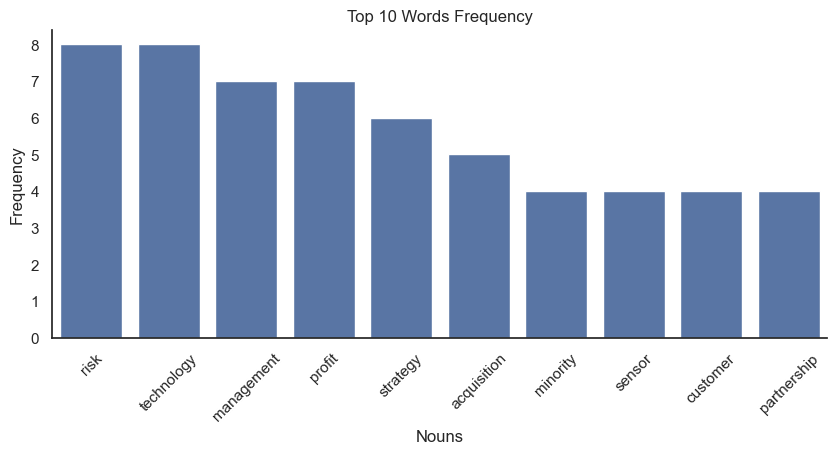

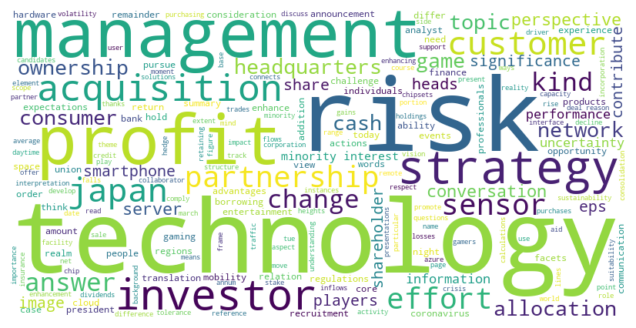


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2021_May_26 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
200  technology         16
5     statement         11
38         sony         11
85     business          9
81      company          9


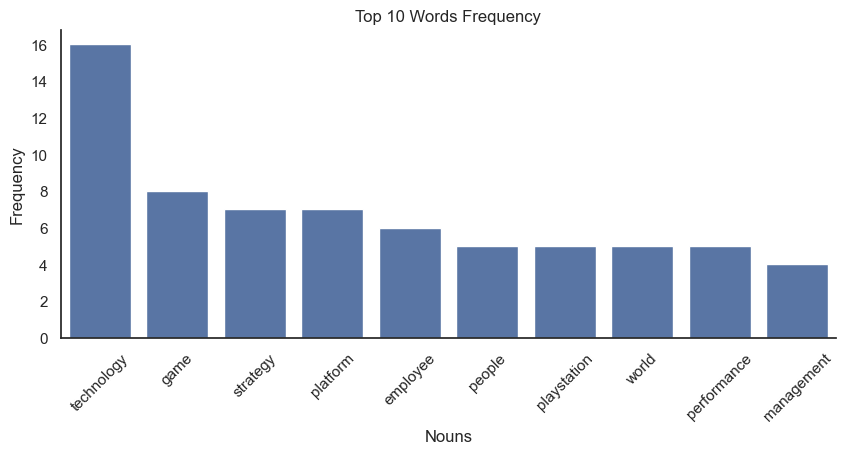

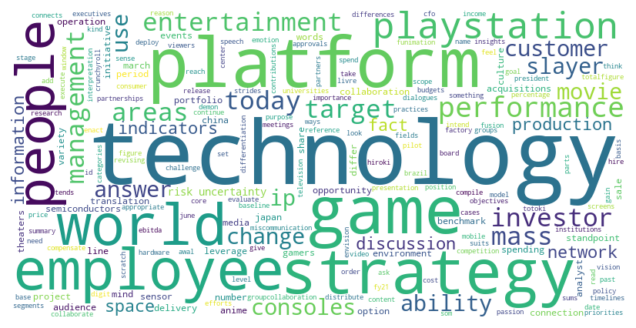


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2022_May_18 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
           Nouns  Frequency
80     business         21
115  investment         15
5     statement         13
28         sony         11
21         game         10


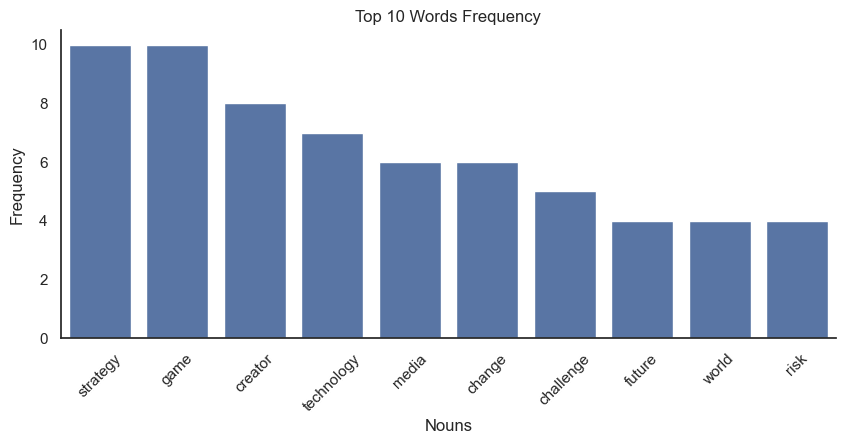

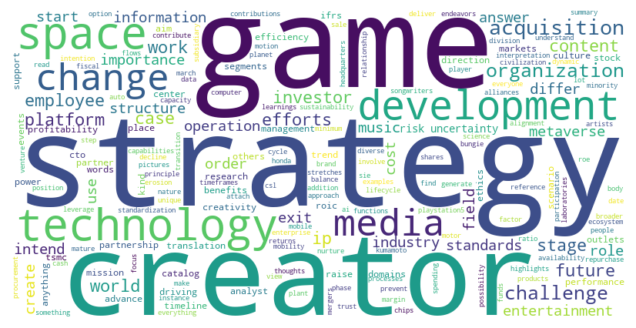


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ qa_E_2023_May_18 ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

top 5 words before cleaning: 
         Nouns  Frequency
19   business         62
10       year         19
39     growth         18
107      plan         17
43       sony         16


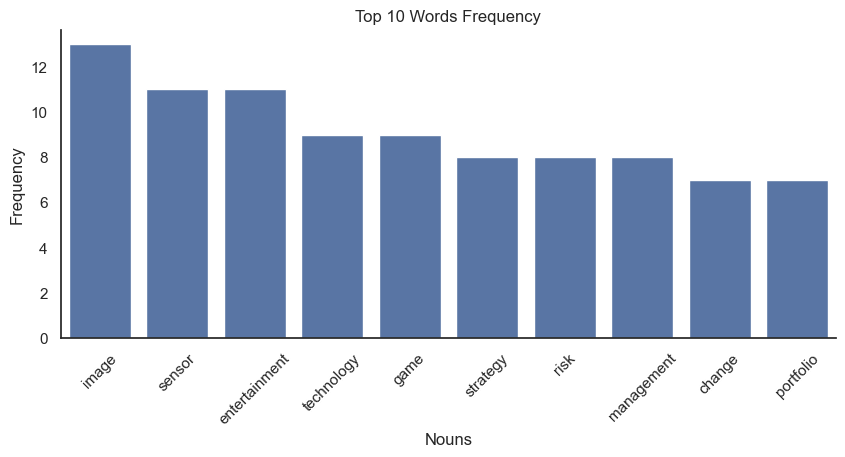

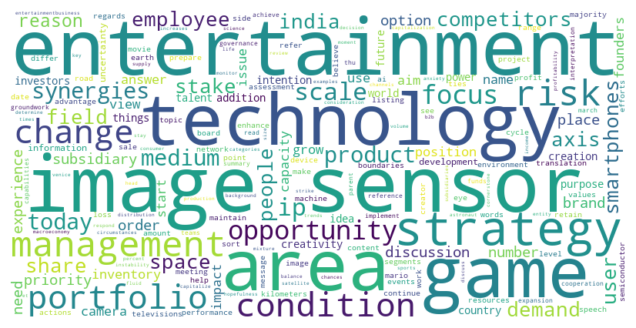

In [28]:
comments_dict = {file_path.name.replace(".pdf",""):tas.pdf_to_text(file_path) for file_path in files_path}
for filename, comment in comments_dict.items():
    print(f"\n■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ {filename} ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n")
    for original, replacement in replacement_mapping.items():  #복수형 단수로 변경
        comment = comment.replace(original, replacement)
        
    tas.set_comments([comment], [])
    print(f"top 5 words before cleaning: \n {tas.df_word_freq.sort_values(by='Frequency', ascending=False).head(5)}")

    tas.set_comments([comment], cleaning_words)
    tas.plot_freq()
    tas.plot_wordcloud()

## colab에서 파일 받기

In [ ]:
!zip -r /content/results_text.zip /content/results_text/
files.download('/content/results_text.zip')

## GPT로 문서 요약 하기
- https://sentigpt.streamlit.app/
- GPT API Key 필요

---

# 이하 테스트 및 개발 중

## sentgpt: 감성 분석

### GPT setting
- [GPT model info @open AI](https://platform.openai.com/docs/models/continuous-model-upgrades)
- [GPT model price @open AI](gpt-4-1106-preview)

In [14]:
API_KEY = "YOUR_API"
gpt_model="gpt-3.5-turbo-1106"

In [8]:
stm = SentiGPT(api_key=API_KEY, gpt_model=gpt_model)

In [10]:
for excel_file in excel_files:
    # 데이터 셋
    excel_file_path = excel_file
    df_uploaded = pd.read_excel(excel_file_path)
    df_sentences = df_uploaded
    
    # GPT 분석
    sentences_list = [sentence for sentence in df_sentences["sentences"]]  # 리스트로 변환
    keywords_list=["brightness", "color", "contrast", "reflection", "viewing angle"]
    analyzed_results_df = stm.analyze_sentences(sentences_list, keywords_list)
    
    # 분석 파일 저장
    file_name=excel_file_path.name.split(".")[0]
    output_file_path = output_folder/file_name
 
    if not output_file_path.exists():
        output_file_path.mkdir(parents=True, exist_ok=True)
    analyzed_results_df.to_csv(output_file_path / f"analyzed_results_{file_name}.csv", index=False, encoding='utf-8')
    
    #그래프 만들기
    # df_analyzed_results = analyzed_results_df - 5  #그래프 범위 조정
    print(f"{file_name}, Plot")
    stm.plot_hist_all(output_folder=output_file_path, file_name=file_name)
    stm.plot_hist_each(output_folder=output_file_path, file_name=file_name)

---